In [57]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from google.colab import drive

In [58]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
img_gray = cv2.imread("/content/drive/MyDrive/Images/4/Lena.bmp", 0)

In [60]:
def prepare_filter(R, C, filter):
  R_filter, C_filter = filter.shape

  filter_padded = np.zeros((R, C))
  filter_padded[0:R_filter, 0:C_filter] = filter
  
  filter_DFT = np.fft.fft2(filter_padded)

  filter_shift = np.fft.fftshift(filter_DFT)

  return filter_shift

In [61]:
def get_filter_magnitude(filter):
  filter_shift = prepare_filter(255, 255, filter)

  magnitude = np.log(np.abs(filter_shift) + 1)

  return magnitude

In [62]:
def apply_filter(image, filter):
  R, C = image.shape
  R_padded = 2 * R
  C_padded = 2 * C
  
  image_padded = np.zeros((R_padded, C_padded))
  image_padded[0:R, 0:C] = image

  image_DFT = np.fft.fft2(image_padded)

  image_shift = np.fft.fftshift(image_DFT)
  filter_shift = prepare_filter(R_padded, C_padded, filter)

  image_filtered = image_shift * filter_shift

  image_filtered_inverse_shift = np.fft.ifftshift(image_filtered)

  image_filtered_IDFT = np.fft.ifft2(image_filtered_inverse_shift)

  image_filtered_real = image_filtered_IDFT.real

  image_filtered_result = image_filtered_real[0:R, 0:C]

  return image_filtered_result

In [63]:
filter_a = np.array([[1/16, 2/16, 1/16], [2/16, 4/16, 2/16], [1/16, 2/16, 1/16]])
filter_b = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
filter_c = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

Text(0.5, 1.0, 'Magnitude: Filter c')

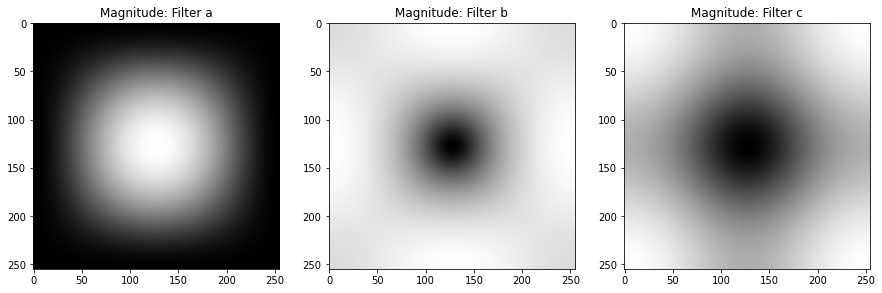

In [64]:
# Filters Magnitudes

filter_a_magnitude = get_filter_magnitude(filter_a)
filter_b_magnitude = get_filter_magnitude(filter_b)
filter_c_magnitude = get_filter_magnitude(filter_c)

fig, plot = plt.subplots(1, 3, figsize = (15, 5))

plot[0].imshow(filter_a_magnitude, cmap='gray')
plot[0].set_title("Magnitude: Filter a")

plot[1].imshow(filter_b_magnitude, cmap='gray')
plot[1].set_title("Magnitude: Filter b")

plot[2].imshow(filter_c_magnitude, cmap='gray')
plot[2].set_title("Magnitude: Filter c")

Text(0.5, 1.0, 'Image: Filtered (Filter c)')

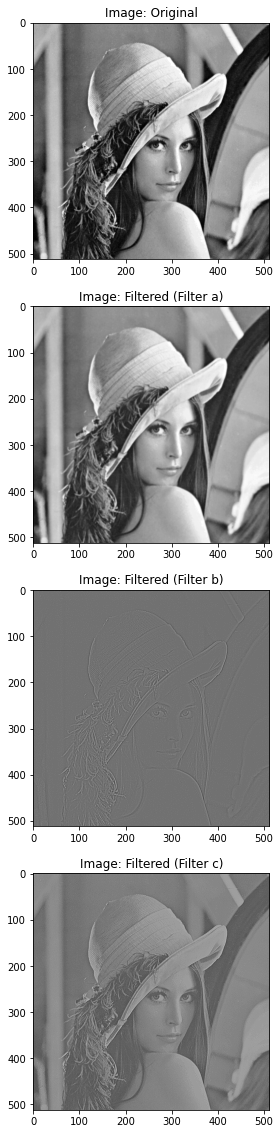

In [65]:
# Apllying Filters on Image

filtered_image_filter_a = apply_filter(img_gray, filter_a)
filtered_image_filter_b = apply_filter(img_gray, filter_b)
filtered_image_filter_c = apply_filter(img_gray, filter_c)

fig, plot = plt.subplots(4, 1, figsize = (5, 20))

plot[0].imshow(img_gray, cmap='gray')
plot[0].set_title("Image: Original")

plot[1].imshow(filtered_image_filter_a, cmap='gray')
plot[1].set_title("Image: Filtered (Filter a)")

plot[2].imshow(filtered_image_filter_b, cmap='gray')
plot[2].set_title("Image: Filtered (Filter b)")

plot[3].imshow(filtered_image_filter_c, cmap='gray')
plot[3].set_title("Image: Filtered (Filter c)")

Text(0.5, 1.0, 'Image: Filtered (Filter a - Separated - 2)')

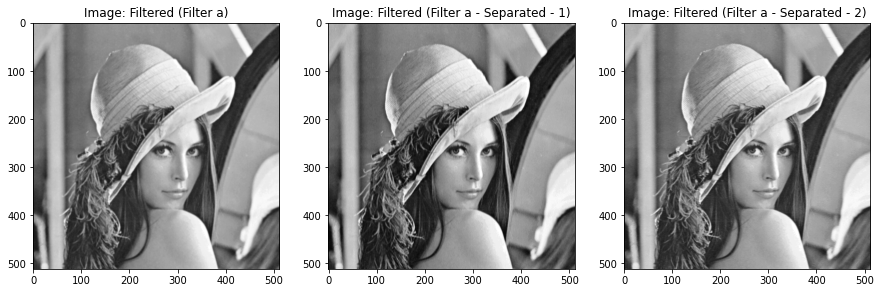

In [66]:
# Separability Test on Filter a

sperated_filter_a_1 = np.array([[1/4], [1/2], [1/4]])
sperated_filter_a_2 = np.array([[1/4, 1/2, 1/4]])

filtered_image_filter_a = apply_filter(img_gray, filter_a)
filtered_image_filter_a_separated_1 = apply_filter(img_gray, sperated_filter_a_1)
filtered_image_filter_a_separated_2 = apply_filter(img_gray, sperated_filter_a_2)

fig, plot = plt.subplots(1, 3, figsize = (15, 5))

plot[0].imshow(filtered_image_filter_a, cmap='gray')
plot[0].set_title("Image: Filtered (Filter a)")

plot[1].imshow(filtered_image_filter_a_separated_1, cmap='gray')
plot[1].set_title("Image: Filtered (Filter a - Separated - 1)")

plot[2].imshow(filtered_image_filter_a_separated_2, cmap='gray')
plot[2].set_title("Image: Filtered (Filter a - Separated - 2)")